In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Numpy library has functions used for working with arrays and matrices
# faster, clearer and better quality code using Numpy

# Matplotlib is a 2D plotting library for visualising data in Python
# mpl_toolkits.mplot3d is a module for making 3D graphs

# Tensorflow is an open-source Machine Learning library, particular focus on training and inference of deep neural networks

### Generate random input data to train on  (data)

In [2]:
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

# generating inputs and targets for the model and saving them into a tensor-friendly file (npz)

### Solving with TensorFlow  (model)

In [3]:
training_data = np.load('TF_intro.npz')

# unnecessary here as the data is stored in an npz file above, but shows how to import data from an npz file

In [4]:
input_size = 2
output_size = 1

# inputs = x and z
# output = y


In [5]:
model = tf.keras.Sequential([tf.keras.layers.Dense(output_size,
                                                   kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                   bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                  )
                                                   ])
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

# unlike sklearn, the model needs to be manually built
# keras is a module within tf required to build the model
# using the L2-norm loss (least sum of squares)
# an epoch is 1 full iteration, 
#verbose=0 is 'silent' or no output about the training is displayed
#verbose=1 is 'progress bar' of the training
#verbose=2 is 'one line per epoch' of the training

Epoch 1/100
32/32 - 0s - loss: 21.8756
Epoch 2/100
32/32 - 0s - loss: 1.1940
Epoch 3/100
32/32 - 0s - loss: 0.4832
Epoch 4/100
32/32 - 0s - loss: 0.4168
Epoch 5/100
32/32 - 0s - loss: 0.3772
Epoch 6/100
32/32 - 0s - loss: 0.3906
Epoch 7/100
32/32 - 0s - loss: 0.3803
Epoch 8/100
32/32 - 0s - loss: 0.3877
Epoch 9/100
32/32 - 0s - loss: 0.3933
Epoch 10/100
32/32 - 0s - loss: 0.4000
Epoch 11/100
32/32 - 0s - loss: 0.4277
Epoch 12/100
32/32 - 0s - loss: 0.3765
Epoch 13/100
32/32 - 0s - loss: 0.3957
Epoch 14/100
32/32 - 0s - loss: 0.3779
Epoch 15/100
32/32 - 0s - loss: 0.3769
Epoch 16/100
32/32 - 0s - loss: 0.3736
Epoch 17/100
32/32 - 0s - loss: 0.3915
Epoch 18/100
32/32 - 0s - loss: 0.3962
Epoch 19/100
32/32 - 0s - loss: 0.4098
Epoch 20/100
32/32 - 0s - loss: 0.3885
Epoch 21/100
32/32 - 0s - loss: 0.4321
Epoch 22/100
32/32 - 0s - loss: 0.4518
Epoch 23/100
32/32 - 0s - loss: 0.3936
Epoch 24/100
32/32 - 0s - loss: 0.4065
Epoch 25/100
32/32 - 0s - loss: 0.4069
Epoch 26/100
32/32 - 0s - loss: 0

### Extract weights and biases

In [6]:
model.layers[0].get_weights()

# this code gets weights for our model
# the generated targets of our model was: 2*xs - 3*zs + 5 + noise

[array([[ 2.0004694],
        [-3.0525367]], dtype=float32),
 array([5.049295], dtype=float32)]

In [7]:
weights = model.layers[0].get_weights()[0]
weights

# the weights are approx 2 - 3

array([[ 2.0004694],
       [-3.0525367]], dtype=float32)

In [8]:
bias = model.layers[0].get_weights()[1]
bias

# the bias is 5

array([5.049295], dtype=float32)

##### as the weights are close to 2 and -3 and our bias is close to 5, this info confirms that our algorithm
##### has learned the underlying relationship between the variables

### Extract the outputs (make predictions)

In [9]:
model.predict_on_batch(training_data['inputs']).round(1)

# these are the values predicted by the model
# and are compared to the targets to evaluate the loss function (after 100 epochs of training)

array([[ -8.3],
       [ 15.8],
       [-25.1],
       [  0.8],
       [ 16.1],
       [ -3.5],
       [  9.6],
       [  1.2],
       [  4.5],
       [-10.2],
       [  6.9],
       [ 25.7],
       [ 13. ],
       [ 40.5],
       [ 15.3],
       [-17.5],
       [ 32. ],
       [ 15.8],
       [ 40.6],
       [  3.4],
       [ -3. ],
       [-28. ],
       [ -4.3],
       [ 29. ],
       [-16.5],
       [ 34. ],
       [-39.5],
       [ 26.5],
       [ 14.5],
       [ 13.2],
       [  6.9],
       [  9.1],
       [ 48.6],
       [-11.1],
       [-33.6],
       [  6.5],
       [  0.9],
       [-14.9],
       [ 10.4],
       [ -2.4],
       [ 39.2],
       [-13. ],
       [-31. ],
       [-30.2],
       [ 39.3],
       [  6.3],
       [-34.8],
       [  0.4],
       [  2.8],
       [ -3.6],
       [ 26.3],
       [-15.7],
       [ 13.8],
       [ 31. ],
       [ 46.7],
       [ 47.3],
       [ 46.8],
       [ 27.6],
       [-35.9],
       [ 48.7],
       [ -0.8],
       [ -2.1],
       [

In [10]:
training_data['targets'].round(1)

# comparing them to the training targets

array([[ -7.6],
       [ 15.7],
       [-24.1],
       [  0.5],
       [ 14.7],
       [ -4.1],
       [  8.6],
       [  0.1],
       [  3.8],
       [-11.1],
       [  7.4],
       [ 25.8],
       [ 13.9],
       [ 40.9],
       [ 15.1],
       [-17.7],
       [ 31.5],
       [ 14.5],
       [ 40.6],
       [  2.8],
       [ -3.3],
       [-28.3],
       [ -3.8],
       [ 27.8],
       [-17.1],
       [ 33.8],
       [-39.8],
       [ 25.8],
       [ 14.7],
       [ 12.5],
       [  8.2],
       [  8.3],
       [ 47.7],
       [-10.7],
       [-33.7],
       [  5.5],
       [  0.3],
       [-15.3],
       [ 10.1],
       [ -3.1],
       [ 38.3],
       [-11.9],
       [-30.9],
       [-30.7],
       [ 38.7],
       [  5.8],
       [-35.3],
       [  0.2],
       [  3.2],
       [ -3.2],
       [ 27. ],
       [-15.3],
       [ 13.2],
       [ 31.1],
       [ 45.3],
       [ 47.8],
       [ 46.5],
       [ 27.7],
       [-35.7],
       [ 48.1],
       [ -1.1],
       [ -1.6],
       [

### Plotting the data

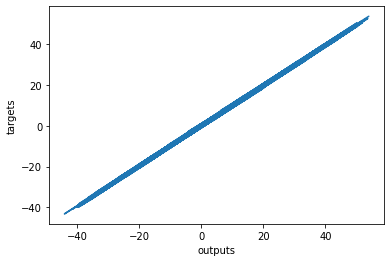

In [11]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# for accuracy of the model, the line should be as close to 45 degrees as possible